In [93]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

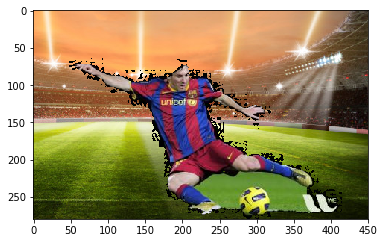

In [94]:
def crop_fg(fg,bg):
    
    fg = cv.cvtColor(fg,cv.COLOR_BGR2RGB)
    bg = cv.cvtColor(bg,cv.COLOR_BGR2RGB)
    
    # TODO: move this line elsewhere in pipeline to handle image sizes
    bg = bg[bg.shape[0]-fg.shape[0]:bg.shape[0],bg.shape[1]-fg.shape[1]:bg.shape[1],:]

    # performing erosion on binary fg image

    gray_fg = cv.cvtColor(fg,cv.COLOR_RGB2GRAY)
    _,mask = cv.threshold(gray_fg,0,1,cv.THRESH_BINARY)

    erosion_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    out = cv.erode(mask,erosion_kernel,5)

    # multiplying eroded mask with fg image to get final crop

    final_crop = fg*np.reshape(out,(out.shape[0],out.shape[1],1))

    # overlaying fg on bg image to obtain final result
    
    out = 1-out
    bg_merged = bg*np.reshape(out,(out.shape[0],out.shape[1],1))
    bg_merged = bg_merged+final_crop

    plt.imshow(bg_merged)

fg = cv.imread("grab-out.jpg")
bg = cv.imread("stadium.jpg")

crop_fg(fg,bg)